<a href="https://colab.research.google.com/github/21B01A0514/CardiacDisesase_Prediction_System/blob/main/Amazon_Sales_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set Visualization Theme
sns.set_theme(style="whitegrid")

In [ ]:
df = pd.read_csv(r'Amazon Sale Report.csv')

<ipython-input-3-e0c8fef47214>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Amazon Sale Report.csv')


In [ ]:
# Display Dataset Overview
print("Dataset Overview:")
print(df.info())
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56938 entries, 0 to 56937
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               56938 non-null  int64  
 1   Order ID            56938 non-null  object 
 2   Date                56938 non-null  object 
 3   Status              56937 non-null  object 
 4   Fulfilment          56937 non-null  object 
 5   Sales Channel       56937 non-null  object 
 6   ship-service-level  56937 non-null  object 
 7   Category            56937 non-null  object 
 8   Size                56937 non-null  object 
 9   Courier Status      56937 non-null  object 
 10  Qty                 56937 non-null  float64
 11  currency            53478 non-null  object 
 12  Amount              53478 non-null  float64
 13  ship-city           56922 non-null  object 
 14  ship-state          56922 non-null  object 
 15  ship-postal-code    56922 non-null 

In [ ]:
#sales overview
print("Column Names in Dataset:")
print(df.columns)
date_column = 'date'

# Check if the column exists
if date_column in df.columns:
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Group by date and calculate total sales
    print("\nSales Overview:")
    sales_trend = df.groupby(date_column)['amount'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sales_trend, x=date_column, y='amount')
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

Column Names in Dataset:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')



Sales Overview:


<ipython-input-6-b3853b50e385>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')  # Ensure date is datetime


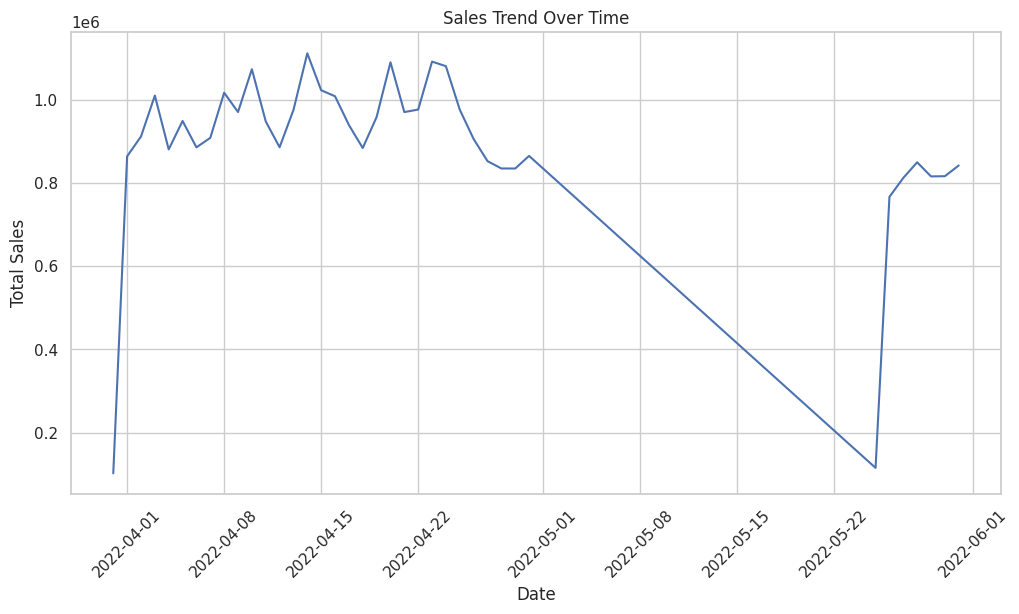

In [ ]:
print("\nSales Overview:")
date_column = 'Date'
amount_column = 'Amount'

if date_column in df.columns and amount_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')  # Ensure date is datetime
    sales_trend = df.groupby(date_column)[amount_column].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sales_trend, x=date_column, y=amount_column)
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Columns '{date_column}' or '{amount_column}' not found in the dataset.")


In [ ]:
#product Analysis
print("Column Names in Dataset:")
print(df.columns)

product_column = 'product_category'
if product_column in df.columns:
    print("\nProduct Analysis:")
    product_sales = df.groupby(product_column)['amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sales.index, y=product_sales.values)
    plt.title("Product Sales Distribution")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

Column Names in Dataset:
Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')



Product Analysis:


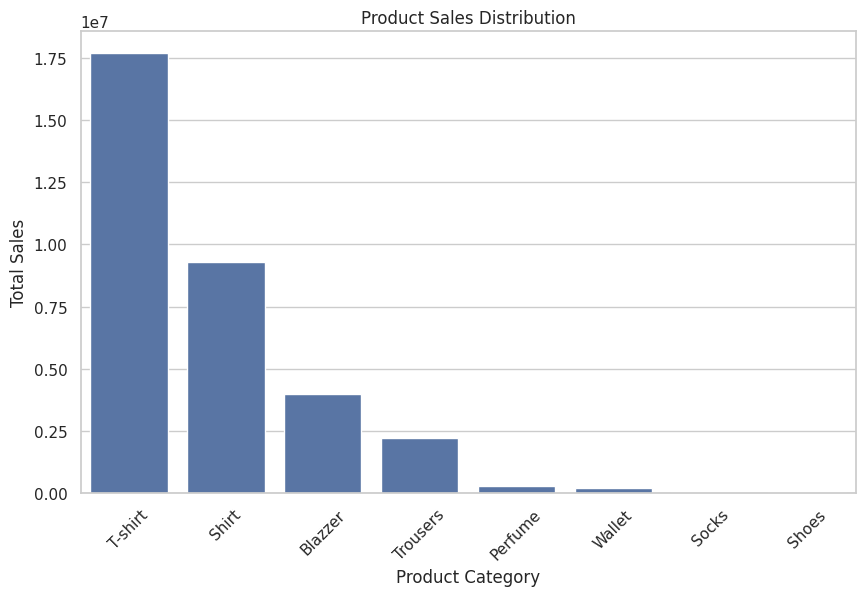

In [ ]:
# Product Analysis
product_column = 'Category'
amount_column = 'Amount'

if product_column in df.columns and amount_column in df.columns:
    print("\nProduct Analysis:")
    product_sales = df.groupby(product_column)[amount_column].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sales.index, y=product_sales.values)
    plt.title("Product Sales Distribution")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Column '{product_column}' or '{amount_column}' not found in the dataset.")



Fulfillment Method Analysis:


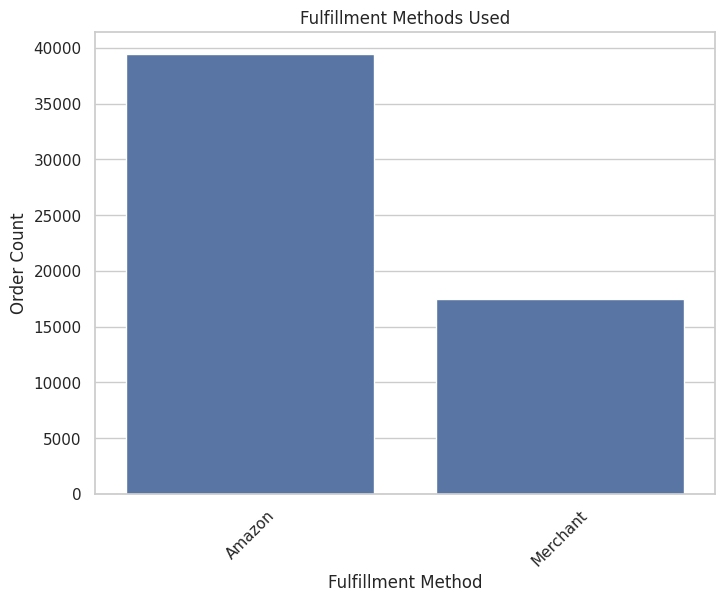

In [ ]:
#  Fulfillment Analysis
print("\nFulfillment Method Analysis:")
fulfillment_column = 'Fulfilment'

if fulfillment_column in df.columns:
    fulfillment_methods = df[fulfillment_column].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=fulfillment_methods.index, y=fulfillment_methods.values)
    plt.title("Fulfillment Methods Used")
    plt.xlabel("Fulfillment Method")
    plt.ylabel("Order Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Column '{fulfillment_column}' not found in the dataset.")


Customer Segmentation:


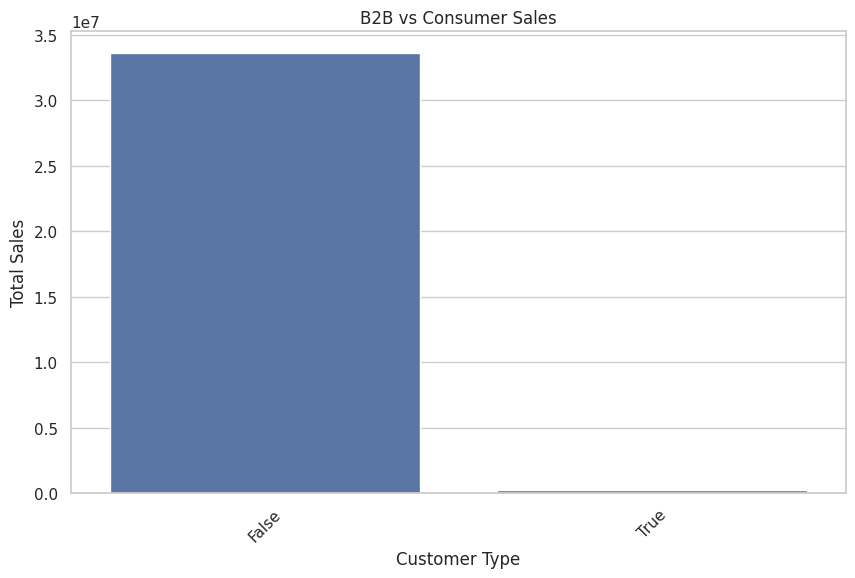

In [ ]:
# Customer Segmentation
customer_column = 'B2B'
amount_column = 'Amount'

if customer_column in df.columns and amount_column in df.columns:
    print("\nCustomer Segmentation:")
    customer_segment = df.groupby(customer_column)[amount_column].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_segment.index, y=customer_segment.values)
    plt.title("B2B vs Consumer Sales")
    plt.xlabel("Customer Type")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Column '{customer_column}' or '{amount_column}' not found in the dataset.")



Geographical Analysis:


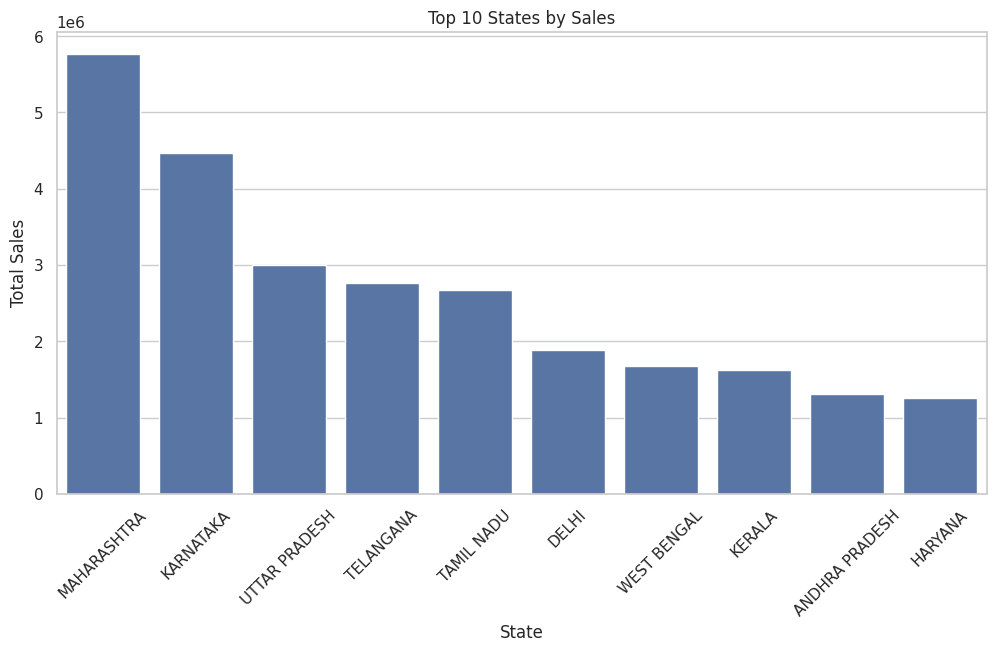

In [ ]:
# Geographical Analysis
state_column = 'ship-state'
amount_column = 'Amount'

if state_column in df.columns and amount_column in df.columns:
    print("\nGeographical Analysis:")
    # Group by state and calculate total sales
    state_sales = df.groupby(state_column)[amount_column].sum().sort_values(ascending=False)

    # Visualize the top 10 states by sales
    plt.figure(figsize=(12, 6))
    sns.barplot(x=state_sales.index[:10], y=state_sales.values[:10])  # Top 10 states
    plt.title("Top 10 States by Sales")
    plt.xlabel("State")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Column '{state_column}' or '{amount_column}' not found in the dataset.")


In [ ]:
# Recommendations
print("\nRecommendations:")
print("- Focus on top-performing product categories such as high sales in the 'Category' column.")
print("- Invest in regions with higher sales (e.g., Top 10 states).")
print("- Optimize fulfillment methods for efficiency, especially for methods with lower adoption.")
print("- Leverage B2B opportunities if significant sales are from business customers.")


Recommendations:
- Focus on top-performing product categories such as high sales in the 'Category' column.
- Invest in regions with higher sales (e.g., Top 10 states).
- Optimize fulfillment methods for efficiency, especially for methods with lower adoption.
- Leverage B2B opportunities if significant sales are from business customers.
